<a href="https://colab.research.google.com/github/ajrianop/Estadistica_Descriptiva_y_Python_UD2023-3/blob/main/Examen_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Para plantear el modelo de regresión lineal utilizando Scikit Learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# **Examen final**

Se quiere realizar un estudio entre los gastos de publicidad y las ventas en un negocio. De este modo tenemos que el costo de publicidad esta descrito por

| Costo Publicidad (USD) | Ventas (USD)|
|-------------------|--------|
| 20                | 400    |
| 25                | 395    |
| 20                | 365    |
| 30                | 475    |
| 40                | 490    |
| 20                | 420    |
| 50                | 560    |
| 40                | 525    |
| 25                | 480    |
| 50                | 510    |

1. Hacer el diagrama de dispersión entre las dos variables. Considere solo la variable ventas y dibuje un diagrama de cajas (explique como lo obtiene).
2. Determine un recta de regresión para que usted pueda determinar un aproximado de las ventas semanales a partir de la inversión que hizo en gastos de publicidad.
3. Calcule un estimado para las ventas de la semana si su gasto en publicidad fue de 27 ($USD).
4. Haga un gráfico de los residuales.
5. Determine el coeficiente de correlación y determinación del problema. (Explique que dice el coeficiente de determinación).


In [3]:
costo_publicidad = [ 20 , 25 , 20 , 30 , 40 ,20 , 50, 40 , 25, 50]
ventas = [ 400 , 395 , 365 , 475 , 490 , 420 , 560 , 525 , 480 , 510]

In [4]:
lst =[]
for i,j in zip(costo_publicidad,ventas):
  lst.append((i,j))
print(lst)

[(20, 400), (25, 395), (20, 365), (30, 475), (40, 490), (20, 420), (50, 560), (40, 525), (25, 480), (50, 510)]


**Regresión Lineal Simple:** Es el modelo más básico y se utiliza cuando hay una relación lineal entre la variable dependiente y una variable independiente. La ecuación de regresión lineal simple tiene la forma:

$$y=b_0 + b_1 x,$$
donde $b_0$ es el intercepto en el eje $y$ y $b_1$ es la pendiente.

In [28]:
# Calculo de cuartiles a partir de la información de ventas
ventas_boxplot = ventas
ventas_boxplot.sort()
ventas_boxplot.tolist()
n = len(ventas_boxplot)

x = ventas_boxplot

Q1 = (3*x[int((n+2)/4 -1)] + x[int((n-6)/4 -1)]) / 4
Q2 = (x[int(n/2 -1)] + x[int(n/2)]) / 2
Q3 = (3*x[int((3*n+2)/4 -1)] + x[int((3*n-2)/4 -1)]) / 4
RQ = Q3-Q1 #Rango intercuartil
cerco_interno_inferior = Q1 - 1.5 * RQ
cerco_interno_superior = Q3 + 1.5 * RQ
cerco_externo_inferior = Q1 - 3 * RQ
cerco_externo_superior = Q3 + 3 * RQ

cuartiles = [cerco_externo_inferior , cerco_interno_inferior , Q1 , Q2 , Q3 , cerco_interno_superior , cerco_externo_superior]

print(cuartiles)

[50.0, 220.625, 391.25, 477.5, 505.0, 675.625, 846.25]


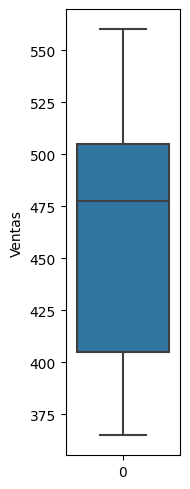

In [6]:
# Diagrama de caja o boxplot
fig = plt.figure(figsize = (2,5))
plt2 = sns.boxplot(ventas)
plt.ylabel('Ventas')
plt.tight_layout()

In [7]:
def grafica_regresion_lineal(datosX, datosY, b0 , b1 , tipo_regresion , descripcion_ejex, descripcion_ejey , leyenda):

  # Se generan los valores del eje x
  x = np.linspace(min(datosX)-(0.05 * len(datosX)), max(datosX)+ (0.05 * len(datosX)), 10)

  # Calculo de la ecuación y = b0 + b1 * x
  y = b0 + b1 * x

  # Grafica linea recta
  plt.figure(figsize=(8, 6))
  plt.plot(x, y, color='red', label = tipo_regresion)
  plt.xlabel('x')
  plt.ylabel('y')

  # Grafica de puntos datos para area_construccion
  plt.scatter(datosX , datosY , label='Datos Originales')
  plt.xlabel(descripcion_ejex)
  plt.ylabel(descripcion_ejey)

  # Leyenda
  plt.legend()
  plt.title(leyenda)

  plt.grid(True)
  plt.legend()
  plt.show()

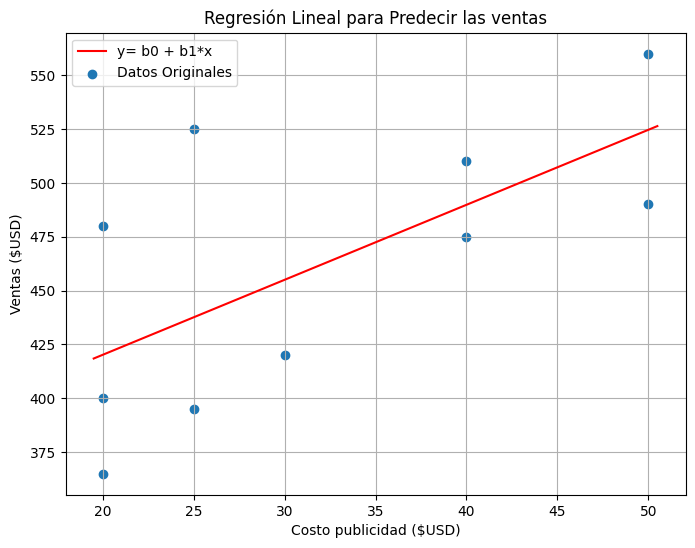

Coeficiente (pendiente): 3.480916030534351
Intercepto: 350.6106870229008
El costo de producción para un área de construcción 27 (m^2) es 444.59541984732823


In [8]:
# Datos de ejemplo: costo de construcción (en miles de dólares) y área de construcción (en metros cuadrados)
# valores de x
X = costo_publicidad
# valores de y
Y = ventas

# Calculo de los coeficientes b_0 y b_1
xmedia = sum(X)/len(X)
ymedia = sum(Y)/len(Y)
b1 = (sum([(x - xmedia)*(y - ymedia) for x,y in zip(X , Y)])) / (sum([ (x - xmedia)**2 for x in X]))
b0 = ymedia - b1 * xmedia
'''
TAREA: Escribir una función que calcule los coeficientes b0 y b1 solo ingresando X (variable independiente) y Y(variable dependiente).
'''
# Parametros para graficar
datosX = X
datosY = Y
tipo_regresion = 'y= b0 + b1*x'
descripcion_ejex = 'Costo publicidad ($USD)'
descripcion_ejey = 'Ventas ($USD)'
leyenda = 'Regresión Lineal para Predecir las ventas'

grafica_regresion_lineal(datosX, datosY, b0 , b1 , tipo_regresion , descripcion_ejex, descripcion_ejey , leyenda)

# Mostrar los coeficientes del modelo manual
print('Coeficiente (pendiente):', b1)
print('Intercepto:', b0)

#Predicción si el costo de publicidad es K
k = 27
prediccion = b0 + b1 * k
print(f'El costo de producción para un área de construcción {k} (m^2) es {prediccion}')

In [9]:
# Como calcular r2
r = b1 * np.sqrt ((sum([ (x - xmedia)**2 for x in X])) / (sum([ (y - ymedia)**2 for y in Y])) )
r2 = r **2
print(f'El coeficiente de determinación es {r2} y el de correlación {r}')

El coeficiente de determinación es 0.43297809872440374 y el de correlación 0.6580107132292025


In [10]:
# 2da forma como calcular r2
Y_prediccion_manual = [b0 + b1 * x for x in X]
r2_2 = 1 - (sum([(y-y_prediccion_manual) ** 2 for y, y_prediccion_manual in zip(Y,Y_prediccion_manual)])) / (sum([(y-ymedia) ** 2 for y in Y]))
r_2 = np.sqrt(r2_2)
print(f'El coeficiente de determinación es {r2_2} y el de correlación {r_2}')

El coeficiente de determinación es 0.43297809872440374 y el de correlación 0.6580107132292025


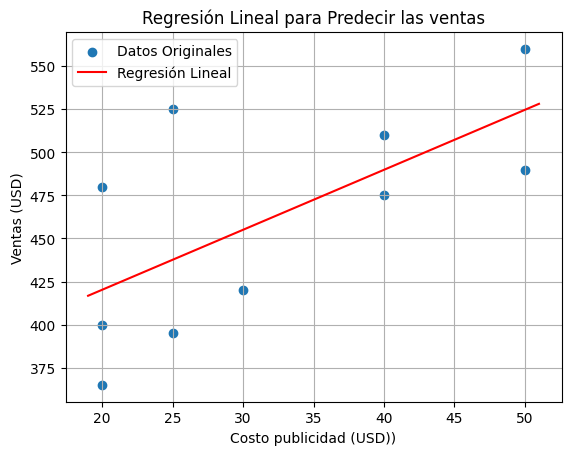

Coeficiente (pendiente): 3.480916030534352
Intercepto: 350.6106870229007
Las ventas al realizar una inversión de 27 (USD )es 444.59541984732823 (USD)


In [11]:
'''
# Utilizando librerías de Python (scikit learn)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
'''
costo_publicidad =  np.array(costo_publicidad)
ventas =  np.array(ventas)

X = costo_publicidad
Y = ventas
# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X.reshape(-1, 1), Y)

# Realizar predicciones para diferentes costos de publicidad
X_prediccion = np.array([19,25,35,45,51]).reshape(-1, 1)
Y_prediccion = modelo.predict(X_prediccion)

# Graficar los datos originales y la regresión lineal
plt.scatter(X, Y, label='Datos Originales')
plt.plot(X_prediccion, Y_prediccion, color='red', label='Regresión Lineal')
plt.xlabel('Costo publicidad (USD))')
plt.ylabel('Ventas (USD)')
plt.legend()
plt.title('Regresión Lineal para Predecir las ventas')
plt.grid(True)
plt.show()

# Mostrar los coeficientes del modelo
print('Coeficiente (pendiente):', modelo.coef_[0])
print('Intercepto:', modelo.intercept_)

#Predicción si el costo de publicidad es K
k_model= 27
prediccion_modelo = modelo.predict([[k_model]])
print(f'Las ventas al realizar una inversión de {k_model} (USD )es {prediccion_modelo[0]} (USD)')

In [12]:
# Realizar predicciones para diferentes costos de publicidad
X_prediccion = np.array(X).reshape(-1, 1)
Y_prediccion = modelo.predict(X_prediccion)
r2_model = r2_score(Y , Y_prediccion)
print(f'El coeficiente de determinación es {r2_model} y el de correlación {np.sqrt(r2)}')

El coeficiente de determinación es 0.43297809872440374 y el de correlación 0.6580107132292025


El **coeficiente de correlación** es una medida estadística que describe la fuerza y dirección de una relación lineal entre dos variables. Indica como es el cambio de ambas variables. El coeficiente de correlación se denota como
$r$ y varía entre -1 y 1.

r=1: Correlación perfecta positiva. Significa que hay una relación lineal positiva perfecta entre las dos variables: cuando una aumenta, la otra también aumenta en proporción constante.

r=−1: Correlación perfecta negativa. Indica una relación lineal negativa perfecta: cuando una variable aumenta, la otra disminuye en proporción constante.

r=0: No hay correlación lineal. Indica que las dos variables no están relacionadas linealmente.

El coeficiente de correlación se calcula mediante la siguientes fórmulas:
$$r = \frac{\sum\limits_{i=1}^{n}(x_i-\bar{x})(y_i - \bar{y})}{\sqrt{\sum\limits_{i=1}^{n}(x_i - \bar{x})^2 \sum\limits_{i=1}^{n} (y_i-\bar{y})^2}},$$
$$r = b_1 \sqrt{\frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2}{\sum\limits_{i=1}^{n} (y_i - \bar{y})^2}},$$
$$r = \frac{n\sum\limits_{i=1}^{n}x_iy_i - \sum\limits_{i=1}^{n} x_i \sum\limits_{i=1}^{n} y_i}{\sqrt{\left[n\sum\limits_{i=1}^{n} x_i ^2 - \left(\sum\limits_{i=1}^{n} x_i\right)^2\right]\left[n\sum\limits_{i=1}^{n} y_i ^2 - \left(\sum\limits_{i=1}^{n} y_i\right)^2\right]}}.$$



El **coeficiente de determinación**, denotado como $R^2$, es una medida estadística que indica la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes en un modelo de regresión. En otras palabras, $R^2$  representa la fracción de la variabilidad total en los datos de la variable dependiente que es explicada por el modelo de regresión.
El coeficiente de determinación puede tomar valores entre 0 y 1. Aquí está cómo se interpreta:

* $R^2 =0$: El modelo de regresión no explica ninguna variabilidad en los datos de la variable dependiente.
* $R^2 =1$: El modelo de regresión explica toda la variabilidad en los datos de la variable dependiente.

Las diferentes formulas para calcular el coeficiente de determinación estan dadas por:
$$R^2 = r^2,$$
$$R^2 = 1 - \frac{RSS}{TSS}$$

donde $RSS = \sum \limits_{i=1}^{n}(y_i - \hat{y_i})^2$ (Residual Sum of Squares) y $TSS = \sum \limits_{i=1}^{n}(y_i - \bar{y})^2$ suma total de los cuadrados corregida (Total Sum of Squares).

In [13]:
# Tarea, calcular los coeficientes de correlación y determinación de los ejemplos anteriores.

r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)>